In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    # Intentar leer el archivo localmente
    data = pd.read_csv('../data/Steel_industry_data.csv')
except FileNotFoundError:
    # Si no se encuentra, leer desde la URL
    data = pd.read_csv('https://raw.githubusercontent.com/luis-huacho/INF648-Proy-Curso-2024-01/main/data/Steel_industry_data.csv')

# Seleccionar las columnas para la regresión
features = data.drop(columns=['date', 'Load_Type'])
target = data['Load_Type']

In [3]:
categorical_features = features[['WeekStatus', 'Day_of_week']]

In [4]:
numerical_features = features.drop(columns=categorical_features)

In [5]:
X_categorical = pd.get_dummies(categorical_features, columns=["Day_of_week", "WeekStatus"], drop_first=False)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numerical = scaler.fit_transform(numerical_features)
X_numerical_ = pd.DataFrame(X_numerical, columns=numerical_features.columns)

X = pd.concat([X_numerical_, X_categorical], axis=1)

In [8]:
from sklearn.cluster import KMeans

# Definimos el número de clusters que queremos (k)
k = 3  # Puedes cambiar este valor según lo que desees

# Inicializamos el modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustamos el modelo a los datos
kmeans.fit(X)

# Obtenemos las etiquetas de los clusters
labels = kmeans.labels_

# Añadimos las etiquetas de los clusters al DataFrame original
X['Cluster'] = labels

In [9]:
X.columns.tolist()

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM',
 'Day_of_week_Friday',
 'Day_of_week_Monday',
 'Day_of_week_Saturday',
 'Day_of_week_Sunday',
 'Day_of_week_Thursday',
 'Day_of_week_Tuesday',
 'Day_of_week_Wednesday',
 'WeekStatus_Weekday',
 'WeekStatus_Weekend',
 'Cluster']

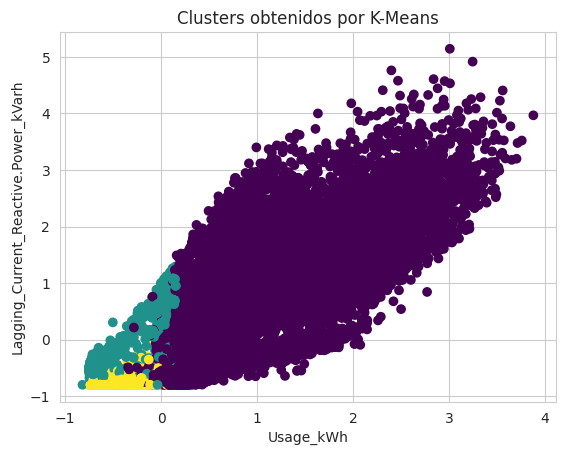

In [11]:

# Visualización de los clusters (opcional)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Usage_kWh')
plt.ylabel('Lagging_Current_Reactive.Power_kVarh')
plt.title('Clusters obtenidos por K-Means')
plt.show()

In [13]:
X['Cluster'].value_counts()

Cluster
1    14378
0    13074
2     7588
Name: count, dtype: int64